In [204]:
library(dplyr)
library(ggplot2)
library(reshape2)

In [40]:
df.train = tbl_df(read.csv("../data/train.csv", stringsAsFactors = FALSE))
df.test = tbl_df(read.csv("../data/test.csv", stringsAsFactors = FALSE))

In [41]:
dim(df.train)
dim(df.test)

setdiff(names(df.train), names(df.test))
setdiff(names(df.test), names(df.train))

[1] 1460   81

[1] 1459   80

[1] "SalePrice"

character(0)

In [43]:
df.combined = rbind(within(df.train, rm('Id','SalePrice')), within(df.test, rm('Id')))
df.combined2 = rbind(df.combined)
dim(df.combined)
dim(df.combined2)

[1] 2919   79

[1] 2919   79

In [45]:
na_cols_count = colSums(is.na(df.combined))
na_cols_count = sort(na_cols_count[na_cols_count > 0], decreasing = TRUE)
na_cols_count

PoolQC  MiscFeature        Alley        Fence  FireplaceQu  LotFrontage 
        2909         2814         2721         2348         1420          486 
 GarageYrBlt GarageFinish   GarageQual   GarageCond   GarageType     BsmtCond 
         159          159          159          159          157           82 
BsmtExposure     BsmtQual BsmtFinType2 BsmtFinType1   MasVnrType   MasVnrArea 
          82           81           80           79           24           23 
    MSZoning    Utilities BsmtFullBath BsmtHalfBath   Functional  Exterior1st 
           4            2            2            2            2            1 
 Exterior2nd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF   Electrical 
           1            1            1            1            1            1 
 KitchenQual   GarageCars   GarageArea     SaleType 
           1            1            1            1

In [46]:
grep('pool', names(df.combined), value=TRUE, ignore.case=TRUE)

[1] "PoolArea" "PoolQC"

In [47]:
df.combined %>% select(PoolQC, PoolArea) %>% tibble::rownames_to_column() %>% filter(is.na(PoolQC) & PoolArea > 0) 

,rowname,PoolQC,PoolArea
1,2421,NA,368
2,2504,NA,444
3,2600,NA,561


In [48]:
df.combined %>% select(PoolQC, PoolArea) %>% group_by(PoolQC) %>% summarise(mean=mean(PoolArea), n=n())

,PoolQC,mean,n
1,Ex,359.75,4
2,Fa,583.5,2
3,Gd,648.5,4
4,NA,0.4719835,2909


In [49]:
df.combined2[2421,'PoolQC'] = 'Ex'
df.combined2[2504,'PoolQC'] = 'Ex'
df.combined2[2600,'PoolQC'] = 'Fa'

In [50]:
df.combined2 %>% select(PoolQC, PoolArea) %>% filter(is.na(PoolQC) & PoolArea > 0) 

,PoolQC,PoolArea


# Garage

In [60]:
df.combined %>% select(contains('garage', ignore.case=TRUE)) %>% summarise_each(funs(sum(is.na(.))))

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1,157,159,159,1,1,159,159


In [61]:
df.combined %>% select(contains('garage', ignore.case=TRUE)) %>% 
tibble::rownames_to_column() %>% filter(is.na(GarageYrBlt)) %>% 
filter(!is.na(GarageType) | GarageCars > 0 | GarageArea > 0)

,rowname,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1,2127,Detchd,NA,NA,1,360,NA,NA
2,2577,Detchd,NA,NA,NA,NA,NA,NA


In [74]:
x = df.combined %>% filter(GarageType == 'Detchd' & GarageCars == 1) %>% 
group_by(GarageQual, GarageCond, GarageFinish) %>% summarise(n=n(), median.area=median(GarageArea)) %>%
arrange(desc(median.area))
head(x)

,GarageQual,GarageCond,GarageFinish,n,median.area
1,Ex,Ex,Fin,1,924
2,TA,Gd,Unf,1,440
3,TA,TA,RFn,6,372
4,NA,NA,NA,1,360
5,Gd,TA,Unf,1,352
6,TA,TA,Fin,4,318.5


In [73]:
df.combined2[2577,'GarageType'] = NA

df.combined2[2127,'GarageYrBlt'] = df.combined2[2127,'YearBuilt']
df.combined2[2127,'GarageFinish'] = 'RFn'
df.combined2[2127,'GarageQual'] = 'TA'
df.combined2[2127,'GarageCond'] = 'TA'

In [77]:
df.combined2[2127,] %>% select(contains('garage', ignore.case=TRUE))
df.combined2[2577,] %>% select(contains('garage', ignore.case=TRUE))

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1,Detchd,1910,RFn,1,360,TA,TA


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1,NA,NA,NA,NA,NA,NA,NA


In [84]:
df.combined2 %>% select(contains('garage', ignore.case=TRUE)) %>% 
filter(is.na(GarageYrBlt) & 
        (!is.na(GarageType) | !is.na(GarageType) | !is.na(GarageQual) | 
         !is.na(GarageCond) | GarageCars > 0 | GarageArea > 0)
      ) 

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond


# Basement

* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms

In [133]:
df.basement = df.combined %>% select(contains('bsmt', ignore.case=TRUE))

In [134]:
df.basement.numeric.missing = df.basement %>% 
select_if(is.numeric) %>% summarise_each(funs(sum(is.na(.))))
df.basement.numeric.missing

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
1,1,1,1,1,2,2


In [135]:
df.basement %>% select_if(is.character) %>% summarise_each(funs(sum(is.na(.))))

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
1,81,82,82,79,80


In [136]:
df.basement %>% tibble::rownames_to_column() %>% 
filter(is.na(BsmtFinSF1) | is.na(BsmtFinSF2) | is.na(BsmtUnfSF) | is.na(TotalBsmtSF) | 
       is.na(BsmtFullBath) | is.na(BsmtHalfBath))

,rowname,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
1,2121,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2189,NA,NA,NA,NA,0,NA,0,0,0,NA,NA


In [131]:
df.combined2[2121, names(df.basement.numeric.missing)] = rep(0, 6)
df.combined2[2189, names(df.basement.numeric.missing)] = rep(0, 6)

df.combined2[2121, names(df.basement.numeric.missing)]
df.combined2[2189, names(df.basement.numeric.missing)]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
1,0,0,0,0,0,0


,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
1,0,0,0,0,0,0


In [170]:
df.basement.char.missing = df.basement %>% tibble::rownames_to_column() %>% 
filter(BsmtFinSF1 > 0 | BsmtFinSF2 > 0 | BsmtUnfSF > 0 | TotalBsmtSF > 0 | BsmtFullBath > 0 | BsmtHalfBath > 0) %>%
filter(is.na(BsmtQual) | is.na(BsmtCond) | is.na(BsmtExposure) | is.na(BsmtFinType1) | is.na(BsmtFinType2))

df.basement.char.missing

,rowname,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
1,333,Gd,TA,No,GLQ,1124,NA,479,1603,3206,1,0
2,949,Gd,TA,NA,Unf,0,Unf,0,936,936,0,0
3,1488,Gd,TA,NA,Unf,0,Unf,0,1595,1595,0,0
4,2041,Gd,NA,Mn,GLQ,1044,Rec,382,0,1426,1,0
5,2186,TA,NA,No,BLQ,1033,Unf,0,94,1127,0,1
6,2218,NA,Fa,No,Unf,0,Unf,0,173,173,0,0
7,2219,NA,TA,No,Unf,0,Unf,0,356,356,0,0
8,2349,Gd,TA,NA,Unf,0,Unf,0,725,725,0,0
9,2525,TA,NA,Av,ALQ,755,Unf,0,240,995,0,0


In [163]:
df.basement %>% select(BsmtCond, BsmtQual) %>% group_by(BsmtCond, BsmtQual) %>% 
summarise(n=n()) %>% filter(BsmtCond %in% c('Fa', 'TA')) %>% arrange(BsmtCond, desc(n)) %>%
filter(row_number()==1)

,BsmtCond,BsmtQual,n
1,Fa,TA,72
2,TA,TA,1177


In [165]:
df.combined2[2218,'BsmtQual'] = 'TA'
df.combined2[2219,'BsmtQual'] = 'TA'

In [164]:
df.basement %>% select(BsmtQual, BsmtCond) %>% group_by(BsmtQual, BsmtCond) %>% 
summarise(n=n()) %>% filter(BsmtQual %in% c('Gd', 'TA')) %>% arrange(BsmtQual, desc(n)) %>%
filter(row_number()==1)

,BsmtQual,BsmtCond,n
1,Gd,TA,1133
2,TA,TA,1177


In [166]:
df.combined2[2041,'BsmtCond'] = 'TA'
df.combined2[2186,'BsmtCond'] = 'TA'
df.combined2[2525,'BsmtCond'] = 'TA'

In [167]:
df.basement %>% select(BsmtExposure) %>% group_by(BsmtExposure) %>% summarise(n=n())

,BsmtExposure,n
1,Av,418
2,Gd,276
3,Mn,239
4,No,1904
5,NA,82


In [172]:
df.basement.char.missing %>% select(rowname, BsmtExposure) %>% filter(is.na(BsmtExposure))

,rowname,BsmtExposure
1,949,NA
2,1488,NA
3,2349,NA


In [174]:
df.combined2[949,'BsmtExposure'] = 'No'
df.combined2[1488,'BsmtExposure'] = 'No'
df.combined2[2349,'BsmtExposure'] = 'No'

In [176]:
df.basement %>% select(BsmtFinType2) %>% group_by(BsmtFinType2) %>% summarise(n=n())

,BsmtFinType2,n
1,ALQ,52
2,BLQ,68
3,GLQ,34
4,LwQ,87
5,Rec,105
6,Unf,2493
7,NA,80


In [175]:
df.basement.char.missing %>% select(rowname, BsmtFinType2) %>% filter(is.na(BsmtFinType2))

,rowname,BsmtFinType2
1,333,NA


In [177]:
df.combined2[333,'BsmtFinType2'] = 'Unf'

In [178]:
df.combined2 %>% select(contains('bsmt', ignore.case=TRUE)) %>% tibble::rownames_to_column() %>% 
filter(BsmtFinSF1 > 0 | BsmtFinSF2 > 0 | BsmtUnfSF > 0 | TotalBsmtSF > 0 | BsmtFullBath > 0 | BsmtHalfBath > 0) %>%
filter(is.na(BsmtQual) | is.na(BsmtCond) | is.na(BsmtExposure) | is.na(BsmtFinType1) | is.na(BsmtFinType2))

,rowname,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath


In [185]:
df.combined %>%
select(-contains('pool', ignore.case=TRUE)) %>%
select(-contains('garage', ignore.case=TRUE)) %>%
select(-contains('bsmt', ignore.case=TRUE)) %>% 
summarise_each(funs(sum(is.na(.)))) %>% 
melt(id.vars = c()) %>% filter(value > 0)

,variable,value
1,MSZoning,4
2,LotFrontage,486
3,Alley,2721
4,Utilities,2
5,Exterior1st,1
6,Exterior2nd,1
7,MasVnrType,24
8,MasVnrArea,23
9,Electrical,1
10,KitchenQual,1


# LotFrontage

In [193]:
    df.lot.frontage = df.combined %>% filter(!is.na(LotFrontage)) %>%
    select(LotFrontage, MSSubClass, MSZoning, LotArea, LotShape, LandContour, LotConfig, 
           Neighborhood, BldgType, HouseStyle, YearBuilt, X1stFlrSF)
    head(df.lot.frontage)

,LotFrontage,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,BldgType,HouseStyle,YearBuilt,X1stFlrSF
1,65,60,RL,8450,Reg,Lvl,Inside,CollgCr,1Fam,2Story,2003,856
2,80,20,RL,9600,Reg,Lvl,FR2,Veenker,1Fam,1Story,1976,1262
3,68,60,RL,11250,IR1,Lvl,Inside,CollgCr,1Fam,2Story,2001,920
4,60,70,RL,9550,IR1,Lvl,Corner,Crawfor,1Fam,2Story,1915,961
5,84,60,RL,14260,IR1,Lvl,FR2,NoRidge,1Fam,2Story,2000,1145
6,85,50,RL,14115,IR1,Lvl,Inside,Mitchel,1Fam,1.5Fin,1993,796


In [197]:
df.lot.frontage %>% select(LotFrontage, BldgType) %>% group_by(BldgType) %>% 
summarise(n=n(), mean=mean(LotFrontage), median=median(LotFrontage))

,BldgType,n,mean,median
1,1Fam,2002,73.91309,70
2,2fmCon,59,67.89831,60
3,Duplex,92,70.83696,70
4,Twnhs,91,24.30769,24
5,TwnhsE,189,41.86243,41


In [201]:
df.lot.frontage %>% select(LotFrontage, LotShape) %>% group_by(LotShape) %>% 
summarise(n=n(), mean=mean(LotFrontage), median=median(LotFrontage))

,LotShape,n,mean,median
1,IR1,647,75.18083,74
2,IR2,48,67.4375,57
3,IR3,11,117.6364,90
4,Reg,1727,66.84887,65


In [200]:
df.lot.frontage %>% select(LotFrontage, MSZoning) %>% group_by(MSZoning) %>% 
summarise(n=n(), mean=mean(LotFrontage), median=median(LotFrontage))

,MSZoning,n,mean,median
1,C (all),23,65.6087,60
2,FV,119,59.52941,65
3,RH,23,55.43478,60
4,RL,1839,74.0522,72
5,RM,426,52.24648,52
6,NA,3,104.6667,109


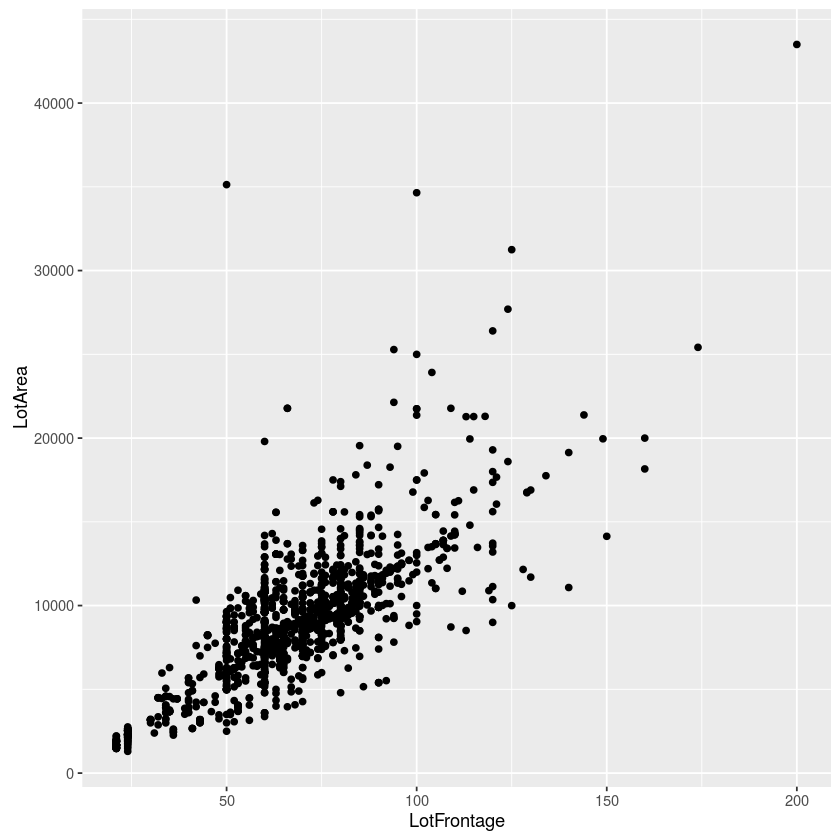

In [206]:
x = df.lot.frontage %>% select(LotFrontage, LotArea, LotShape)
p = ggplot(x %>% filter(LotShape=="Reg"), aes(LotFrontage, LotArea))
p + geom_point()